In [1]:
# IMDB -> 외국의 영화 평론 사이트(TV등 포함)
# LSTM, CNN을 혼합해 사용.

In [ ]:
# 그래픽카드 확인용.
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [ ]:
# https://thebook.io/080228/part05/ch18/02/

In [1]:
# 일단 필요한거 import

In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D  # 숫자1 + D임
from tensorflow.keras.datasets import imdb  # imdb 도 keras에서 제공함
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 일단 DB를 불러와서 trainset, testset 나눠보자

# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [3]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [4]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))  #0.5 -> 50%
# 여기까진 해본거, 여기부터 새로운거


# Conv1D와 MaxPooling1D입니다. 
# 앞서 Conv2D와 MaxPooling2는 16장의 ‘MNIST 손글씨 인식’에서 다루었습니다. 
# 하지만 2차원 배열을 가진 이미지와는 다르게 
# 지금 다루고 있는 데이터는 배열 형태로 이루어진 1차원이라는 차이가 있습니다. 
# Conv1D는 Conv2D의 개념을 1차원으로 옮긴 것입니다. 
# 컨볼루션 층이 1차원이고 이동하는 배열도 1차원입니다.
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))  # 64개 만들고, 마스크 사이즈 = 5
# 마스크 사이즈 5면, 좌우 2개씩 날라감,
# padding을 valid 를 주면, 사이즈 변화를 안시킴
# strides=1 -> 마스크가 이동할떄, 1칸씩 이동한다는 뜻.  -> 근데 default가 1임. 1이면, 안써도 될듯

model.add(MaxPooling1D(pool_size=4))   # pool_size=4  -> 1가로세로 4칸 정사각형, 1차원
model.add(LSTM(55))  # 위와 같은 형태로 LSTM을 통과시킴
model.add(Dense(1))  # 이렇게 나온 결과를 Dense에 보내는 것,  출력은 하나(1).  긍정이냐, 부정이냐를 아는것이기 때문에 1.
model.add(Activation('sigmoid'))  # 일부러 소개하려고 이거 쓴듯.  이건 Activation 클래스를 만든것,. 
# model.add(Dense(1), Activation='sigmoid') #이것처럼 기존은 함수로 쓴 것.
# 그런데 앞으로 우린 클래스로 많이 쓸 것

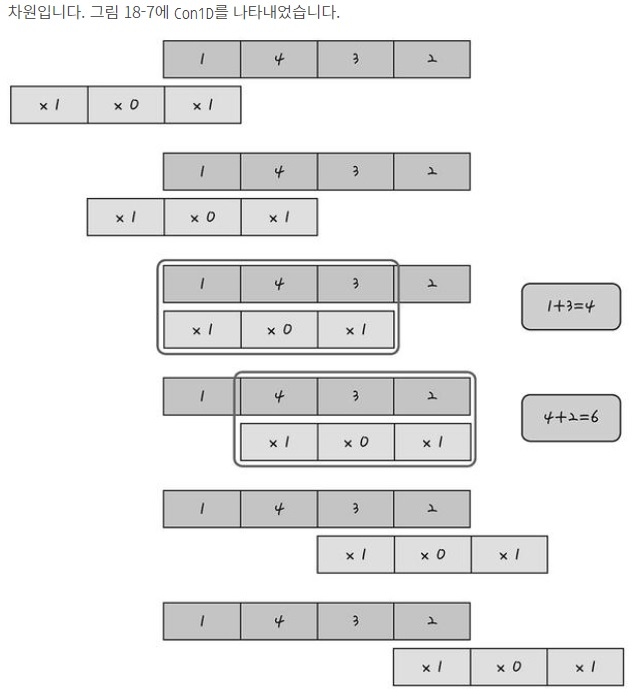

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [6]:
# 손실함수랑 옾티마이저

# 모델의 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 모델을 훈련 시켜봄

# 모델의 실행
# history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))
# batch사이즈는 100, epochs=5, 인데 5는 너무 작으니까 10으로 잡자
hist = model.fit(x_train, y_train, batch_size=100, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
250/250 [==============================] - 10s 20ms/step - loss: 0.4558 - accuracy: 0.7661 - val_loss: 0.3350 - val_accuracy: 0.8531
Epoch 2/10
250/250 [==============================] - 4s 16ms/step - loss: 0.2940 - accuracy: 0.8762 - val_loss: 0.3217 - val_accuracy: 0.8591
Epoch 3/10
250/250 [==============================] - 4s 16ms/step - loss: 0.2454 - accuracy: 0.9008 - val_loss: 0.3314 - val_accuracy: 0.8576
Epoch 4/10
250/250 [==============================] - 10s 41ms/step - loss: 0.2078 - accuracy: 0.9193 - val_loss: 0.3382 - val_accuracy: 0.8554
Epoch 5/10
250/250 [==============================] - 21s 82ms/step - loss: 0.1725 - accuracy: 0.9349 - val_loss: 0.3818 - val_accuracy: 0.8523
Epoch 6/10
250/250 [==============================] - 4s 16ms/step - loss: 0.1394 - accuracy: 0.9471 - val_loss: 0.3992 - val_accuracy: 0.8462
Epoch 7/10
250/250 [==============================] - 4s 16ms/step - loss: 0.1102 - accuracy: 0.9606 - val_loss: 0.4738 - val_accuracy: 0.8

In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 7s 8ms/step - loss: 0.5378 - accuracy: 0.8443

 Test Accuracy: 0.8443


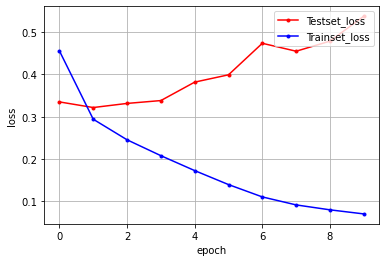

In [12]:
#  그래프로 그려보자

# 테스트셋의 오차
# y_vloss = history.history['val_loss']
y_vloss = hist.history['val_loss']
  
# 학습셋의 오차
# y_loss = history.history['loss']
y_loss = hist.history['loss']

# 그래프로 표현
# x_len = numpy.arange(len(y_loss))
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
# 1,2번째 이후, 3번쨰까지
# test는 계속 오름,  train은 계속 떨어지는데,
# 이는 과대적합이라고 볼 수 있음.

In [ ]:
# 컴벌루션?  뉴럴 네트워크를
# 이런식으로 text에서도 사용함. (이미지뿐 아니라)